In [1]:
import string
import re
from collections import Counter
from tqdm import tqdm
from copy import copy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
ALPHABET = ' абвгдежзийклмнопрстуфхцчшщъыьэюя'
ALPHABET_EN = string.ascii_lowercase + ' '

In [3]:
with open('corpora/AnnaKarenina.txt', 'r') as iofile:
    text_1 = iofile.read().lower()
with open('corpora/WarAndPeace.txt', 'r') as iofile:
    text_2 = iofile.read().lower()
text_ru = text_1 + text_2
text_ru = ''.join([c for c in text_ru if c in ALPHABET])
text_ru = re.sub('\s+', ' ', text_ru)
text_ru[:1000]

'анна каренина один из самых знаменитых романов льва толстого начинается ставшей афоризмом фразой все счастливые семьи похожи друг на друга каждая несчастливая семья несчастлива посвоему это книга о вечных ценностях о любви о вере о семье о человеческом достоинстве лев толстойроман широкого дыханиячасть перваялев толстойанна каренинароман широкого дыханияанна каренина поразила современников вседневностью содержания необычайная свобода раскованность повествования удивительно сочетались в этом романе с цельностью художественного взгляда автора на жизнь он выступал здесь как художник и мыслитель и назначение искусства видел не в том чтобы неоспоримо разрешить вопрос а в том чтобы заставить любить жизнь в бесчисленных никогда не истощимых всех ее проявлениях в е годы один маститый писатель повидимому гончаров сказал достоевскому это вещь неслыханная это вещь первая кто у нас из писателей может поравняться с этим а в европе кто представит хоть чтонибудь подобное фм достоевский находил в нов

In [4]:
with open('corpora/WarAndPeaceEng.txt', 'r') as iofile:
    text_en = iofile.read().lower()
text_en = ''.join([c for c in text_en if c in ALPHABET_EN])
text_en = re.sub('\s+', ' ', text_en)
text_en[:1000]

'the project gutenberg ebook of war and peace by leo tolstoythis ebook is for the use of anyone anywhere at no cost and with almostno restrictions whatsoever you may copy it give it away or reuse itunder the terms of the project gutenberg license included with thisebook or online at wwwgutenbergorgtitle war and peaceauthor leo tolstoytranslators louise and aylmer maudeposting date january ebook last updated march language english start of this project gutenberg ebook war and peace an anonymous volunteer and david widgerwar and peaceby leo tolstoytolstoicontentsbook one chapter ichapter iichapter iiichapter ivchapter vchapter vichapter viichapter viiichapter ixchapter xchapter xichapter xiichapter xiiichapter xivchapter xvchapter xvichapter xviichapter xviiichapter xixchapter xxchapter xxichapter xxiichapter xxiiichapter xxivchapter xxvchapter xxvichapter xxviichapter xxviiibook two chapter ichapter iichapter iiichapter ivchapter vchapter vichapter viichapter viiichapter ixchapter xchap

In [5]:
len(text_ru), len(text_en)

(2330472, 3046439)

### Простейший частотный метод (униграммы)

In [6]:
def get_random_substr(text, substr_len=1000):
    idx = np.random.randint(0, len(text) - substr_len + 1)
    return text[idx : idx + substr_len]

def get_init_char_map(alphabet):
    orig_chars = list(alphabet)
    permuted_chars = np.random.permutation(orig_chars)
    return dict(zip(orig_chars, permuted_chars))

def encode_by_map(text, char_map):
#     print(len(char_map), len(set(text)))
    assert len(char_map) >= len(set(text))
    return ''.join([char_map[c] if c in char_map else 'о' for c in text])

def decode_by_freq(text, corpora_counter):
    orig_freq = [i[0] for i in corpora_counter.most_common()]
    enc_freq = [i[0] for i in Counter(text).most_common()]
    freq_map = dict(zip(enc_freq, orig_freq))
    return ''.join([freq_map[c] for c in text])

def evaluate_accuracy(orig, decoded):
    assert len(orig) == len(decoded)
    correct_cnt = 0
    for i in range(len(orig)):
        if orig[i] == decoded[i]:
            correct_cnt += 1
    return correct_cnt / len(orig)

def test_on_corpora(text, alphabet):
    corpora_counter = Counter(text)
    results = {}
    for char_len in [100, 1000, 10_000, 20_000, 30_000, 40_000, 50_000, 100_000]:
        acc = []
        for _ in range(10):
            substr = get_random_substr(text, char_len)
            ch_map = get_init_char_map(alphabet)
            encoded_str = encode_by_map(substr, ch_map)
            decoded_str = decode_by_freq(encoded_str, corpora_counter)
            acc.append(evaluate_accuracy(substr, decoded_str))
        results[char_len] = sum(acc) / len(acc)
    plt.plot(list(results.keys()), list(results.values()))
    plt.xlabel('Characters')
    plt.ylabel('Accuracy')
    plt.title('Basic frequency method (uni-grams)')
    plt.show()
    return results

In [7]:
corpora_counter = Counter(text_ru)

In [8]:
substr = get_random_substr(text_ru, 1000)
substr

'лько тем что видел в сердце кити страх девства и униженья и любя ее он почувствовал этот страх и униженье и сразу отрекся от своих доводовнаступило молчание она все чертила мелом по столу глаза ее блестели тихим блеском подчиняясь ее настроению он чувствовал во всем существе своем все усиливающееся напряжение счастия ах я весь стол исчертила сказала она и положив мелок сделала движенье как будто хотела встатькак же я останусь один без нее с ужасом подумал он и взял мелок постойте сказал он садясь к столу я давно хотел спросить у вас одну вещьон глядел ей прямо в ласковые хотя и испуганные глаза пожалуйста спросите вот сказал он и написал начальные буквы к в м о э н м б з л э н и т буквы эти значили когда вы мне ответили этого не может быть значило ли это что никогда или тогда не было никакой вероятности чтоб она могла понять эту сложную фразу но он посмотрел на нее с таким видом что жизнь его зависит от того поймет ли она эти словаона взглянула на него серьезно потом оперла нахмуренны

In [9]:
ch_map = get_init_char_map(ALPHABET)
encoded_str = encode_by_map(substr, ch_map)
encoded_str

'жъмнсрчщсбрнсэйичжсэсычкилчсмйрйсыркгьсичэырэгсйсфойхчоъвсйсжтювсччсносзнбфэырэнэгжс рнрсыркгьсйсфойхчоъчсйсыкгефснркчмывснрсыэнйьсинэнинэогырфзйжнсщнжбгойчсногсэычсбчкрйжгсщчжнщсзнсырнжфспжгегсччсюжчырчжйсрйьйщсюжчымнщсзнибйоввыъсччсогыркнчойтсносбфэырэнэгжсэнсэычщсыфцчырэчсыэнчщсэычсфыйжйэгтцччывсогзквхчойчсыбгырйвсгьсвсэчыъсырнжсйыбчкрйжгсымгегжгсногсйсзнжнхйэсщчжнмсыичжгжгсиэйхчоъчсмгмсюфирнсьнрчжгсэыргръмгмсхчсвсныргофыъснийосючесоччсысфхгынщсзнифщгжсносйсэевжсщчжнмсзнырнарчсымгегжсносыгивыъсмсырнжфсвсигэонсьнрчжсызкныйръсфсэгысниофсэчцъноспжвичжсчасзквщнсэсжгымнэячсьнрвсйсйызфпгооячспжгегсзнхгжфаыргсызкныйрчсэнрсымгегжсносйсогзйыгжсогбгжъоячсюфмэясмсэсщснс сосщсюсесжс сосйсрсюфмэяс рйсеогбйжйсмнпигсэясщочснрэчрйжйс рнпнсочсщнхчрсюяръсеогбйжнсжйс рнсбрнсоймнпигсйжйсрнпигсочсюяжнсоймгмнасэчкнвронырйсбрнюсногсщнпжгсзновръс рфсыжнхофтсукгефсонсносзныщнркчжсогсоччсысргмйщсэйинщсбрнсхйеоъсчпнсегэйыйрснрсрнпнсзнащчрсжйсногс рйсыжнэгногсэепжвофжгсогсочпнсычкъчеонсзнрнщснзчкжгсогьщфкчооя

In [10]:
decoded_str = decode_by_freq(encoded_str, corpora_counter)
decoded_str

'льдо нек ыно всмел в иеямце дснс иняаж мевинва с ртсзетьу с лючу ее от поырвинвовал шнон иняаж с ртсзетье с ияагр оняедиу он ивосж мовомовтаинрпсло колыатсе ота вие ыеянсла келок по инолр блага ее члеинелс нсжск члеидок помыстууиь ее таиняоетсю от ырвинвовал во виек ирэеинве ивоек вие рислсваюэееиу тапяузетсе иыаинсу аж у веиь инол сиыеянсла идагала ота с полозсв келод имелала мвсзетье дад чрмно жонела винаньдад зе у оинатриь омст чег тее и рзаиок помркал от с вгул келод поинохне идагал от иамуиь д инолр у мавто жонел ипяоиснь р ваи омтр веэьот блумел ех пяуко в лаидовйе жону с сипрбаттйе блага позалрхина ипяоисне вон идагал от с тапсиал таыальтйе чрдвй д в к о ш т к ч г л ш т с н чрдвй шнс гтаыслс добма вй кте онвенслс шнобо те козен чйнь гтаысло лс шно ыно тсдобма слс нобма те чйло тсдадох веяоунтоинс ыноч ота кобла потунь шнр илозтрю щяагр то от поиконяел та тее и надск всмок ыно зсгть ебо гавсисн он нобо похкен лс ота шнс иловаота вгблутрла та тебо иеяьегто понок опеяла тажкряеттй

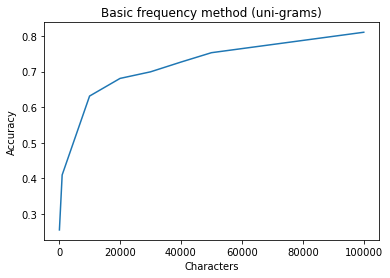

{100: 0.255,
 1000: 0.4096,
 10000: 0.6314,
 20000: 0.680995,
 30000: 0.6995066666666666,
 40000: 0.72699,
 50000: 0.753308,
 100000: 0.8108129999999999}

In [11]:
# russian corpora
test_on_corpora(text_ru, ALPHABET)

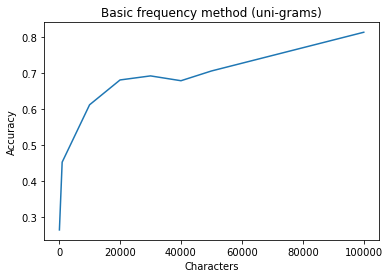

{100: 0.265,
 1000: 0.45339999999999997,
 10000: 0.61285,
 20000: 0.681905,
 30000: 0.6931999999999999,
 40000: 0.6797774999999999,
 50000: 0.706882,
 100000: 0.8145579999999999}

In [12]:
# english corpora
test_on_corpora(text_en, ALPHABET_EN)

В целом, уже неплохой результат

### Частотный метод с биграммами

In [13]:
new_alphabet = string.ascii_lowercase + string.digits
new_alphabet

'abcdefghijklmnopqrstuvwxyz0123456789'

In [14]:
new_alphabet_en = ALPHABET + string.digits

In [15]:
def get_char_map_2_alphabets(alphabet1, alphabet2):
    orig_chars = list(alphabet1)
    permuted_chars = np.random.permutation(list(alphabet2))
    return dict(zip(orig_chars, permuted_chars))

def extract_bigrams(text):
    bigrams = []
    for i in range(len(text) - 1):
        bigrams.append(text[i : i+2])
    return bigrams

def decode_bigrams(text, corpora_bigram_counter):
    
    bigrams = extract_bigrams(text)
    orig_freq = [i[0] for i in corpora_bigram_counter.most_common()]
    enc_freq = [i[0] for i in Counter(bigrams).most_common()]    
    for enc, orig in dict(zip(enc_freq, orig_freq)).items():
        text = text.replace(enc[0], orig[0]).replace(enc[1], orig[1])
    return text

def test_on_corpora_bigrams(text, alphabet):
    corpora_counter = Counter(extract_bigrams(text))
    results = {}
    for char_len in [100, 1000, 10_000, 20_000, 30_000, 40_000, 50_000, 100_000]:
        acc = []
        for _ in range(10):
            substr = get_random_substr(text, char_len)
            ch_map = get_char_map_2_alphabets(list(set(substr)), alphabet)
            encoded_str = encode_by_map(substr, ch_map)
            decoded_str = decode_bigrams(encoded_str, corpora_counter)
            acc.append(evaluate_accuracy(substr, decoded_str))
        results[char_len] = sum(acc) / len(acc)
    plt.plot(list(results.keys()), list(results.values()))
    plt.xlabel('Characters')
    plt.ylabel('Accuracy')
    plt.title('Basic frequency method (bi-grams)')
    plt.show()
    return results

In [16]:
ch_map = get_char_map_2_alphabets(list(set(substr)), new_alphabet)
encoded_str = encode_by_map(substr, ch_map)
encoded_str

'm14ah75zhw7ahkus5mhkh25rsc5h4u7uh27rvihs5k27kvhuh0du65d18huhmxq8h55hadhoaw0k27kakvmhg7a7h27rvihuh0du65d15huh2rvt0ha7r5428ha7h2kauihsakasakdv270oumahzamwvdu5hadvhk25hw5r7umvhz5mazhoah27am0hemvtvh55hqm5275muh7uiuzhqm524azhoaswud8821h55hdv27ra5duxhadhw0k27kakvmhkahk25zh20f527k5h2ka5zhk25h02umukvxf5528hdvor865du5h2wv27u8hvih8hk521h27amhu2w5r7umvh24vtvmvhadvhuhoama6ukhz5ma4h2s5mvmvhsku65d15h4v4hq0s7ahia75mvhk27v714v4h65h8ha27vd021hasudhq5thd55h2h06v2azhoas0zvmhadhuhkt8mhz5ma4hoa27a975h24vtvmhadh2vs821h4h27am0h8hsvkdahia75mh2ora2u71h0hkv2hasd0hk5f1adhem8s5mh59hor8zahkhmv24akp5hia78huhu2o0evddp5hemvtvhoa6vm0927vh2ora2u75hka7h24vtvmhadhuhdvou2vmhdvwvm1dp5hq04kph4hkhzhahghdhzhqhthmhghdhuh7hq04kphg7uhtdvwumuh4aesvhkphzd5ha7k57umuhg7aeahd5hza657hqp71htdvwumahmuhg7ahw7ahdu4aesvhumuh7aesvhd5hqpmahdu4v4a9hk5ra87da27uhw7aqhadvhzaemvhoad871hg70h2ma6d0xhyrvt0hdahadhoa2za7r5mhdvhd55h2h7v4uzhkusazhw7ah6utd1h5eahtvku2u7ha7h7aeahoa9z57hmuhadvhg7uh2makvadvhktem8d0mvhdvhd5eah25r15tdahoa7azhao5rmvhdviz0r5ddp

In [17]:
text_bigrams = extract_bigrams(text_ru)
corpora_counter = Counter(text_bigrams)
len(text_bigrams), len(corpora_counter)

(2330471, 876)

In [18]:
ch_map = get_char_map_2_alphabets(list(set(substr)), new_alphabet)
encoded_str = encode_by_map(substr, ch_map)
decoded_str = decode_bigrams(encoded_str, corpora_counter)
decoded_str

' йоеописоспеов  и ово ич хиоо п о пчазо ив пвао оро оиойко о  икоииоеооеесрв пвева о пепо пчазо оро оиойио о ча роепчио коепо ве зо еве евоа пре  еосе сао иоеоаов иосичп  аоси есоеео пе ро  а аоииои и пи  оп з сои и оесоее с окк йоииооа пчеио  оеоосрв пвева овеов исо рби пвио веисов иор    ва бии кооаечкоио ио са п коазокови йо пе о  сичп  ао оа а аоеоао оее ео воси еоо  и а ао в оиойиооаооир пеозепи аов папйоаоооиокое паор йое  ооии ооиио ороа есоее рса оеоо ов к оси еооее пеэпио оа а оеоо а к йооо пе роко авоеозепи о ече  пйорова ое оровибйеоо  к и оиэоечксеово а оевьиозепко о  ер аооьио  а аоееоа рэ пао ече  пиовепо оа а оеоо ооае  а ооаса йоьиоировьооовосоео ооосоио о о ооо опоировьо п о оас   оое  аовьосоиоепвип   о пе еооиосеоипоиьпйо оас  ео  о пеоспеоо ое  ао   опе  аооиоиь еоо оаоеэовичекпое п оспеиоеоаосе  аоееокпйо про  еоор осча рооеоеооее сепчи ооаооиио опао сов  есоспеоо  ойои ео ав   поепопе еоееэсипо  оеоао п о  еваеоаов   кор аооаоои ео ичйи оеоеепесоееич аооазсрчиооь

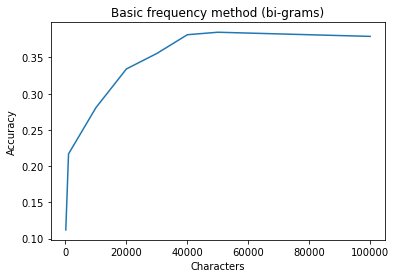

{100: 0.11200000000000002,
 1000: 0.2169,
 10000: 0.28073000000000004,
 20000: 0.33414,
 30000: 0.35550666666666664,
 40000: 0.3813325,
 50000: 0.38475,
 100000: 0.379029}

In [19]:
test_on_corpora_bigrams(text_ru, new_alphabet)

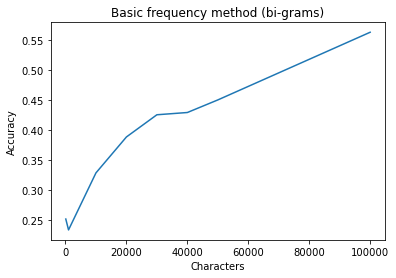

{100: 0.25200000000000006,
 1000: 0.2339,
 10000: 0.32885,
 20000: 0.388665,
 30000: 0.42562333333333324,
 40000: 0.42937250000000005,
 50000: 0.4503260000000001,
 100000: 0.5630120000000001}

In [20]:
test_on_corpora_bigrams(text_en, new_alphabet_en)

Хуже чем с униграммами, скорее всего потому что нужны гораздо более крупные корпуса текстов для лучшей статистики

### MCMC sampling

Используем алгоритм Метрополиса-Гастингса. Возьмем случайную расшифровку и каждую итерацию будем случайно менять в ней два символа, затем замерять правдоподобие. Запустим несколько эпох, чтобы не застревать в локальных эстремумах.

In [21]:
substr = get_random_substr(text_ru, 1000)
ch_map = get_init_char_map(ALPHABET)
encoded_str = encode_by_map(substr, ch_map)
encoded_str

'хтбдюхжъзцлбжрбоцьухдзпьцяжьл чахуаьлшцтцжхмрфуфжчцфдцяфъеубжъь цсдбдьбцлуьнглтфрфцъфуф шдфцфъдфрфцчбмъхцхцлуьнглтьоцчгбцфпбуьъдфцфяяфмьвьнцлтхмх цфдцулбсцтжфсбц буьдхцяфднедзбцл фухцпефцтфленцьцезцуфаб цтхгбелнцуфцутчлцяжьюхуь цфдцфюжхйхнлшцтц буьдчцьцумн цбрфцяфъцжчтчц буьдцьцжхъцюз цюзцуфоеьцуфцутчлцдфцдбцсфрцяфднешцуцпбсцъб фцьцфефоънцдблтф штфцахрфуцфецрфуфжьуаьицузжхмь цлебяхдчцхжтхъшьпчцлуфбцдбъфчсбдьбцмхпбсцюз фцяжфльешцрчюбждлтфрфцяжбъуфъьеб нцлтхмх цлебяхдцхжтхъшьпцьцтжхетфцьцнлдфцжхлеф тфух ц буьдчцуцпбсцъб фбл ьцюзцтхтцуцяжфа збцузюфжзцулбцчбмъзцяжфль ьцрчюбждлтфрфцяжбъуфъьеб нцефцбрфцузюжх ьцюзцулбсьцюб зсьцыефрфцдбцдчгдфцюз фцебябжшцгбцуфлбсшцчбмъфуцлфр хлдзцяжфльешцбл ьцгбцъухцфетхгчелнцяжфльешцефцлдбетфуцсфгбецфетхмхешлнцфецюх  феьжфутьцьцефръхцлехжхнцяхжеьнцсфгбецузюжхешцъжчрфрфцьмцлуфьицехтцтхтцжхлпбецублшцючъбецяфебжндцдфцбл ьцеф штфцфъьдцчбмъцлуьнглтфрфцдбцючъбецяжфльешцлдбетфуцючъбецюх  феьжфухешлнцбрфцъхгбцузюбжчецьцдхжфпдфцябжб фгхецбсчцехтцпефцяжфеьудхнцяхжеьнц

In [22]:
def get_bigram_freq(text):
    cnter = Counter(extract_bigrams(text))
    all_bigram_sum = sum(cnter.values())
    return {k: (v / all_bigram_sum) for k, v in cnter.items()} # smoothed

def get_log_likelihood(text, ch_map, orig_freq):
    decoded = encode_by_map(text, ch_map)
    decoded_freq = Counter(extract_bigrams(decoded))
    all_bigram_sum = sum(decoded_freq.values())
    score = 0
    for key, val in decoded_freq.items():
        if key in orig_freq:
            score += val * np.log(orig_freq[key])
        else:
            score += val * np.log(1 / all_bigram_sum) # smoothed
    return score

def permute_char_map(char_map):
    d = copy(char_map)
    key1, key2 = np.random.choice(list(d.keys()), 2)
    d[key1], d[key2] = d[key2], d[key1]
    return d

In [23]:
def decode_by_mcmc_sampling(encoded_str, alphabet, orig_freq, 
                            text_chars=None, n_iters=10_000, n_epochs=5):
    best_map = None
    best_score = -np.inf
    if text_chars is None:
        text_chars = set(encoded_str)
    for epoch in tqdm(range(n_epochs), total=n_epochs):
        ch_map = get_char_map_2_alphabets(text_chars, alphabet)
        score = get_log_likelihood(encoded_str, ch_map, orig_freq)

        for i in range(10_000):
            new_ch_map = permute_char_map(ch_map)
            new_score = get_log_likelihood(encoded_str, new_ch_map, orig_freq)
            if np.exp(new_score - score) > np.random.rand():
                ch_map = new_ch_map
                score = new_score
                
        print(epoch, round(score,2), encode_by_map(encoded_str, ch_map)[:100])
        if score > best_score:
            best_score = score
            best_map = ch_map
    print(f'Best score: {best_score}')
    return best_map

In [24]:
bigram_corpora_freq = get_bigram_freq(text_ru)
best_map = decode_by_mcmc_sampling(encoded_str, ALPHABET, bigram_corpora_freq, n_epochs=10)

 10%|█         | 1/10 [00:08<01:19,  8.83s/it]

0 -5517.84 акенбарды сергею иванычи прислушавшись к разговору он подтвердил мнение свияжского довольно одного у


 20%|██        | 2/10 [00:17<01:10,  8.77s/it]

1 -5599.09 акенбарды сергею иваными прислуфавфись к рашговору он подтвердил хнение свиязского довольно одного у


 40%|████      | 4/10 [00:34<00:52,  8.72s/it]

2 -5850.56 укенмурды серзею ивунычи присляфувфись к рушзаваря ан падтвердил гнение свийжсказа давальна адназа я
3 -5922.55 акержапдш сепгею иваршчи бпислуфавфись к пазговопу ор боднвепдил хрерие свиймского довольро одрого у


 50%|█████     | 5/10 [00:43<00:43,  8.73s/it]

4 -6286.15 ртнезракм снагню воремшв бавсуяхрохвсы т аръглолая ле блкионакву ченевн совйжстлгл клолуыел лкелгл я


<ipython-input-23-aad4c4302265>:13: RuntimeWarning: overflow encountered in exp
  if np.exp(new_score - score) > np.random.rand():
 70%|███████   | 7/10 [01:00<00:25,  8.62s/it]

5 -5923.48 окенгоршя серзею илонячи присмуьольисы к роъзалару ан пашвлершим хнение слийжсказа шаламына ашназа у
6 -6255.59 рктяпродз стоътю лирязэл волсажгриглсм к орыънинож ня вндеитодла чятялт сильщскнън днинамян ндянън ж


 80%|████████  | 8/10 [01:09<00:17,  8.66s/it]

7 -6621.98 ъьевжъычпасеымегаитъвпбиаяыисршэътэисхаьаыъщм т ыша вая члтеычиразвевиеастикусь м ач т рхв а чв м аш


100%|██████████| 10/10 [01:26<00:00,  8.66s/it]

8 -5868.46 акенэатры петгей иваныби чтипмушавшипь к тазговоту он чорлветрим хнение пвияжпкого ровомьно орного у
9 -6494.89 еыокцердйнсорчожнаиекйпанурасмъбеибасьнынрешч и рън кну дтиордамнзкокаонсиаягсы ч нд и мьк н дк ч нъ
Best score: -5517.837498556633


In [25]:
substr

'акенбарды сергей иванычи прислушавшись к разговору он подтвердил мнение свияжского довольно одного уезда а свияжский уже очевидно оппозиция сказал он всем кроме левина понятные слова что костя и ты вошел кажется во вкус прибавил он обращаясь к левину и взял его под руку левин и рад был бы войти во вкус но не мог понять в чем дело и отойдя несколько шагов от говоривших выразил степану аркадьичу свое недоумение зачем было просить губернского предводителя сказал степан аркадьич и кратко и ясно растолковал левину в чем делоесли бы как в прошлые выборы все уезды просили губернского предводителя то его выбрали бы всеми белыми этого не нужно было теперь же восемь уездов согласны просить если же два откажутся просить то снетков может отказаться от баллотировки и тогда старая партия может выбрать другого из своих так как расчет весь будет потерян но если только один уезд свияжского не будет просить снетков будет баллотироваться его даже выберут и нарочно переложат ему так что противная партия 

In [26]:
encode_by_map(encoded_str, best_map)

'акенбарды сергею иванычи прислушавшись к разговору он подтвердил мнение свияжского довольно одного уезда а свияжскию уже очевидно оппозиъия сказал он всем кроме левина понятные слова что костя и ты вошел кажется во вкус прибавил он обрафаясь к левину и взял его под руку левин и рад был бы воюти во вкус но не мог понять в чем дело и отоюдя несколько шагов от говоривших выразил степану аркадьичу свое недоумение зачем было просить губернского предводителя сказал степан аркадьич и кратко и ясно растолковал левину в чем делоесли бы как в прошлые выборы все уезды просили губернского предводителя то его выбрали бы всеми белыми щтого не нужно было теперь же восемь уездов согласны просить если же два откажутся просить то снетков может отказаться от баллотировки и тогда старая партия может выбрать другого из своих так как расчет весь будет потерян но если только один уезд свияжского не будет просить снетков будет баллотироваться его даже выберут и нарочно переложат ему так что противная партия 

In [27]:
evaluate_accuracy(encode_by_map(encoded_str, best_map), substr) 

0.993

Получили практически идеальную точность

### Расшифровка последнего сообщения

In [28]:
to_decode = "←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏"

Воспользуемся небольшой хитростью: будем запускать наш MCMC-алгоритм с warm start'ом, передав символы алфавита уже отсортированными по частоте

In [29]:
def get_char_map_2_alphabets(alphabet1, alphabet2):
    orig_chars = list(alphabet1)
    permuted_chars = list(alphabet2)
    return dict(zip(orig_chars, permuted_chars))

In [30]:
alphabet_corpora = [c[0] for c in Counter(text_ru).most_common()]
decode_corpora = [c[0] for c in Counter(to_decode).most_common()]

In [31]:
best_map = decode_by_mcmc_sampling(to_decode, alphabet_corpora, bigram_corpora_freq,
                                   decode_corpora, n_iters=10_000, n_epochs=50)

  2%|▏         | 1/50 [00:03<02:49,  3.46s/it]

0 -1232.74 если вй вимите ножзальнйы или подти ножзальнйы текст у чтого сооршения котожйы легко пжодитать скоже


  4%|▍         | 2/50 [00:06<02:44,  3.42s/it]

1 -1259.23 осли вй вимито неркальнйы или пегти неркальнйы тодст у чтеше сеежхония детерйы лошде прегитать сдеро


  6%|▌         | 3/50 [00:10<02:48,  3.58s/it]

2 -1241.81 есла вй вамате норуыльнйх ала подта норуыльнйх текст и чтого соожшеная которйх легко продатыть скоре


 10%|█         | 5/50 [00:17<02:34,  3.43s/it]

3 -1251.54 еила вй вамате норжыльнйх ала поста норжыльнйх текит у чтого иоошденая которйх легко просатыть икоре
4 -1266.51 ивло пй покоси недральнйх оло чемсо недральнйх ситвс у гсеые веежшиноя теседйх лиыте чдемосась втеди


 14%|█▍        | 7/50 [00:23<02:24,  3.37s/it]

5 -1265.99 ивно пй поколи тедранятйь оно чегло тедранятйь лисвл у блеые веешзитох селедйь ниысе чдеголаля вседи
6 -1234.29 если вй вимите нодральнйы или пожти нодральнйы текст у штого соочбения котодйы легко пдожитать скоде


 18%|█▊        | 9/50 [00:30<02:17,  3.34s/it]

7 -1266.42 еста вй вамале ноыюятинйь ата бодла ноыюятинйь лексл у глоро соожшенах колоыйь терко быодаляли скоые
8 -1273.71 овни сй сикило теыманятйь ини чедли теыманятйь лопвл у шлебе веегротих пелеыйь нобпе чыедилаля впеыо


 22%|██▏       | 11/50 [00:37<02:07,  3.27s/it]

9 -1245.64 если вй вимите нопзальнйы или борти нопзальнйы текст у жтого соошдения котопйы легко бпоритать скопе
10 -1247.15 еила вй вамате норкыльнйх ала поста норкыльнйх тедит у чтого иоожшеная доторйх легдо просатыть идоре


 24%|██▍       | 12/50 [00:40<02:03,  3.26s/it]

11 -1252.26 етли сй сириве ножхыланйь или подви ножхыланйь вектв у звого тообмения ковожйь легко пжодивыва ткоже


 26%|██▌       | 13/50 [00:43<02:02,  3.30s/it]

12 -1235.31 если вй вимите ножзальнйы или порти ножзальнйы текст у чтого соошдения котожйы легко пжоритать скоже


 28%|██▊       | 14/50 [00:47<02:01,  3.38s/it]

13 -1238.97 если вы вимите нордалйныь или почти нордалйныь текст у жтого соошбения которыь легко прочитатй скоре


 30%|███       | 15/50 [00:51<02:04,  3.57s/it]

14 -1271.35 езни жй жидиле товканытйь ини посли товканытйь лехзл у блоро зоочшетия холовйь нерхо пвосилалы зхове


 32%|███▏      | 16/50 [00:55<02:05,  3.70s/it]

15 -1245.1 если вй вимите ножхыланйь или подти ножхыланйь текст у зторо соочшения котожйь лерко пжодитыта скоже


 34%|███▍      | 17/50 [00:58<02:02,  3.70s/it]

16 -1233.63 если вй вимите ножзальнйы или порти ножзальнйы текст у чтого соодшения котожйы легко пжоритать скоже


 38%|███▊      | 19/50 [01:05<01:51,  3.59s/it]

17 -1279.42 есна вй вашате дорюьнудйх ана почта дорюьнудйх текст и жтоло соомыедая которйх нелко прочатьту скоре
18 -1269.44 ерна кы каьале товмйнитыю ана посла товмйнитыю ледрл у злого роожшетая доловыю негдо пвосалйли рдове


 40%|████      | 20/50 [01:09<01:46,  3.54s/it]

19 -1263.83 исто кя комоли недратйняь ото пегло недратйняь ливсл у шлеые сеечжинох веледяь тиыве пдеголалй сведи
20

 44%|████▍     | 22/50 [01:16<01:36,  3.45s/it]

 -1272.91 едси чй чикине волхаствйь иси помни волхаствйь нердн у юного доожшевия ронолйь сегро пломинант дроле
21 -1294.79 ижто пй позони велхатувйь ото серно велхатувйь нишжн г кнеые жеечдивоя шенелйь тиыше слеронану жшели


 48%|████▊     | 24/50 [01:22<01:28,  3.39s/it]

22 -1275.02 овли кй кисино тепзалытйь или бемни тепзалытйь нодвн у гнеше веерхотия денепйь лошде бпеминаны вдепо
23 -1270.01 осни кй кичило тедранятйь ини пемли тедранятйь ловсл у блеые сеешготих веледйь ноыве пдемилаля сведо


 52%|█████▏    | 26/50 [01:29<01:20,  3.35s/it]

24 -1240.5 если вы вимите ножзалйныю или подти ножзалйныю текст у чтого сооршения котожыю легко пжодитатй скоже
25 -1237.02 если вй вимите нордальнйы или пожти нордальнйы текст у чтого соошзения которйы легко прожитать скоре


 56%|█████▌    | 28/50 [01:35<01:13,  3.32s/it]

26 -1237.38 если вй вимите нордальнйы или почти нордальнйы текст у бтого соошжения которйы легко прочитать скоре
27 -1269.45 итло сй сокови нежзалянйь оло педво нежзалянйь вичтв у хвеые теершином чевежйь лиыче пжедовавя тчежи


 60%|██████    | 30/50 [01:42<01:06,  3.32s/it]

28 -1232.0 если вй вимите нодральнйы или пожти нодральнйы текст у чтого соошбения котодйы легко пдожитать скоде
29 -1286.99 етна чх чарале жиымонйжхю ана кидла жиымонйжхю лестл у пливи тиишзежая силиыхю невси кыидалолй тсиые


 64%|██████▍   | 32/50 [01:49<00:59,  3.32s/it]

30 -1238.97 есла вй вамате норхылинйь ала подта норхылинйь текст у чтого соожшеная которйь легко продатыти скоре
31 -1251.15 етни чй чидиле ворканывйь ини помли ворканывйь лестл у блого тоожшевия солорйь негсо промилалы тсоре


 68%|██████▊   | 34/50 [01:55<00:53,  3.33s/it]

32 -1235.16 если вй вимите нодральнйх или почти нодральнйх текст у ютого соожшения котодйх легко пдочитать скоде
33 -1252.81 етла чй чакаве норяылинйь ала подва норяылинйь веств у звого тоожшенам соворйь легсо продавыви тсоре


 70%|███████   | 35/50 [01:59<00:51,  3.45s/it]

34 -1233.52 если вй вимите ножзальнйы или порти ножзальнйы текст у чтого соошдения котожйы легко пжоритать скоже


 74%|███████▍  | 37/50 [02:06<00:43,  3.31s/it]

35 -1269.1 ости кы кимило нерхатйныь ити педли нерхатйныь ловсл у глеже сеешбония велерыь тожве предилалй сверо
36 -1239.83 есла вй вамате норбылинйь ала подта норбылинйь текст у чтого соожшеная которйь легко продатыти скоре


 78%|███████▊  | 39/50 [02:12<00:36,  3.31s/it]

37 -1285.7 ивла тй тарани дешголудйь ала жезна дешголудйь нисвн х бнеые веемкидая сенешйь лиысе жшезанону всеши
38 -1242.23 есла вй вамате норжылинйь ала подта норжылинйь текст у чтого соошзеная которйь легко продатыти скоре


 82%|████████▏ | 41/50 [02:19<00:29,  3.31s/it]

39 -1244.19 етни сй симиве ложзанылйь ини подви ложзанылйь вертв у бвого тоошчелия ровожйь негро пжодивавы троже
40 -1245.5 етни сй симиве ложзанылйь ини подви ложзанылйь вертв у хвого тоочбелия ровожйь негро пжодивавы троже


 86%|████████▌ | 43/50 [02:25<00:22,  3.22s/it]

41 -1249.42 есла ви вамате норбыльний ала подта норбыльний текст у чтого соожшеная которий легко продатыть скоре
42 -1258.08 етни сй симиве лорзанылйь ини подви лорзанылйь вектв у хвого тоошбелия коворйь негко продивавы ткоре
43

 90%|█████████ | 45/50 [02:31<00:15,  3.17s/it]

 -1265.39 ерно пй поготе ласминылйь оно вадто ласминылйь текрт у чтаза раажшелоя катасйь незка всадотиты ркасе
44 -1259.67 есла вй вамате норюяльнйх ала подта норюяльнйх текст у чтого соожшенаи которйх легко продатять скоре


 96%|█████████▌| 48/50 [02:41<00:06,  3.15s/it]

45 -1232.26 если вй вимите нордальнйы или пожти нордальнйы текст у чтого соошбения которйы легко прожитать скоре
46 -1252.4 етни сй сикиве лопзанылйь ини бодви лопзанылйь вертв у жвого тоошчелия ровопйь негро бподивавы тропе
47 -1239.31 если вй вимите ножзальнйы или подти ножзальнйы текст у штого соочхения котожйы легко пжодитать скоже


 98%|█████████▊| 49/50 [02:44<00:03,  3.13s/it]

48 -1238.99 если вй вимите норзальнйы или подти норзальнйы текст у жтого соочбения которйы легко продитать скоре


100%|██████████| 50/50 [02:47<00:00,  3.34s/it]

49 -1234.51 если вй вимите норхальнйы или подти норхальнйы текст у чтого соожшения которйы легко продитать скоре
Best score: -1232.0000247362025


In [32]:
encode_by_map(to_decode, best_map)

'если вй вимите нодральнйы или пожти нодральнйы текст у чтого соошбения котодйы легко пдожитать скодее всего вй все смелали пдавильно и полужите раксиральнйы шалл за послемнее жетведтое замание кудса хотя конежно я нижего не ошебаю'

В целом, считывается хоть и не безупречно, но довольно легко

### Триграммы

Подправим наши функции, чтобы они могли работать с триграммами:

In [34]:
def extract_trigrams(text):
    trigrams = []
    for i in range(len(text) - 2):
        trigrams.append(text[i : i+3])
    return trigrams

def get_trigram_freq(text):
    cnter = Counter(extract_trigrams(text))
    all_trigram_sum = sum(cnter.values())
    vocab_len = len(set(text))**3 # дополнительная регуляризация
    return {k: (v / (all_trigram_sum + vocab_len)) for k, v in cnter.items()}

def get_log_likelihood(text, ch_map, orig_freq):
    decoded = encode_by_map(text, ch_map)
    decoded_freq = Counter(extract_trigrams(decoded))
    all_trigram_sum = sum(decoded_freq.values())
    vocab_len = len(set(text))**3
    score = 0
    for key, val in decoded_freq.items():
        if key in orig_freq:
            score += val * np.log(orig_freq[key])
        else:
            score += val * np.log(1 / (all_trigram_sum + vocab_len))
    return score

In [37]:
trigram_corpora_freq = get_trigram_freq(text_ru)
best_map = decode_by_mcmc_sampling(to_decode, alphabet_corpora, trigram_corpora_freq, decode_corpora, n_epochs=10)

 10%|█         | 1/10 [00:04<00:38,  4.29s/it]

0 -1750.23 если вы видите нормальный или почти нормальный текст у бтого соошжения который легко прочитать скоре


 30%|███       | 3/10 [00:12<00:29,  4.27s/it]

1 -1750.23 если вы видите нормальный или почти нормальный текст у бтого соошжения который легко прочитать скоре
2 -1750.23 если вы видите нормальный или почти нормальный текст у бтого соошжения который легко прочитать скоре


 50%|█████     | 5/10 [00:21<00:21,  4.34s/it]

3 -1756.1 если вы видите нормальный или почти нормальный текст у хтого соожшения который легко прочитать скоре
4 -1750.23 если вы видите нормальный или почти нормальный текст у бтого соошжения который легко прочитать скоре


 70%|███████   | 7/10 [00:29<00:12,  4.23s/it]

5 -1932.03 отва ку казало нердивыную ава пемла нердивыную лостл х глеже тееьшоная селерую вожсе премалилы тсеро
6 -1934.48 есло ви водоте нмржальния оло пмчто нмржальния текст у гтмым сммхшеной кмтмрия леыкм прмчотать скмре
7

 90%|█████████ | 9/10 [00:37<00:03,  3.95s/it]

 -1750.23 если вы видите нормальный или почти нормальный текст у бтого соошжения который легко прочитать скоре
8 -1960.51 адло гс гокона теьбылится оло перно теьбылится начдн у знеже деехйатом ченеься лажче пьероныни дчеьа
9

100%|██████████| 10/10 [00:40<00:00,  4.09s/it]

 -1883.15 етна сь сазале ворминывью ана подла ворминывью лектл у блого тоочшевая колорью негко продалилы ткоре
Best score: -1750.233733245608


In [38]:
encode_by_map(to_decode, best_map)

'если вы видите нормальный или почти нормальный текст у бтого соошжения который легко прочитать скорее всего вы все сделали правильно и получите максимальный шалл за последнее четвертое задание курса хотя конечно я ничего не ошежаю'

Получилось быстрее и точнее, чем с биграммами. Теперь сравним на более крупных кусках текста

In [47]:
substr = get_random_substr(text_ru, 3000)
ch_map = get_init_char_map(ALPHABET)
encoded_str = encode_by_map(substr, ch_map)
encoded_str

'ъвкихбсзятля вядвбушеяиелямвъах тдцауядйбяавщвбе ясщвеняаезфебу всфуное хфйчягхдвфтфсзявялтксмвлямхмяцъватфуяое ея еое хфйчягхдвфтфсзявяъвсэва елямхмяцъватфуяъвсэвацяъвщвктфяхэвсфвбяэхщебятяхбемсечяхбемсх аквщтиящвящсеыяаебхыякцмвщватщштчсзяфеэекуяэтсх теляихсфвящсэвлт хбяюфвфяфемсфяелцямхгхбвсуяифвясяфеыяэвкямхмяв явсфхбсзядегяое йяв яюфтлтясхлйлтяэквемфхлтядвбееясбцотбяъвсэвацяиеляэкеоаевиещта вея ефекэе теяибе хясвщефхяоебхщшеъвяцчфтявфя еъвя еяслцрхбвяхбемсезяхбемсх аквщтихяв яэекесфхбятгбхъхфуяфвбумвямвъахяибе ящвсэвбугвщхщштсуяэквывавлябтпхяпхксмвчяжхлтбттяцсмвбуг цбявфя еъввсфхщштсуяват яхбемсечяхбемсх аквщтиявэцсфтбяъвбвщцясвдткхзялйсбтяэвфвлякхссез  вявъбз цбсзятяэвшебямяащектяцямвфвквчя хаезбсзящсфкефтфуяъкхжт нябтатнятщх вщ цтямхмяв тящсеястбу йятягавквщйяжтгтиесмтяэвацлхбяхбемсечяхбемсх аквщтияъбзазя хялвъциеъвясякхсиесх  йлтяацштсфйлтядхме дхкахлтямхлекъекхятя хямкхс цняшенягхфз цфвъвящялц аткеям згзялтлвямвфвкйыяелця хавядйбвяэквчфтясэкхщеабтщвясмхгх вяифвящсеящялткеяесф

In [48]:
substr

'горчался им но больше чем когданибудь был доволен своею деятельностьюженатый заботится о мирском как угодить жене неженатый заботится о господнем как угодить господу говорит апостол павел и алексей александрович во всех делах руководившийся теперь писанием часто вспоминал этот текст ему казалось что с тех пор как он остался без жены он этими самыми проектами более служил господу чем преждеочевидное нетерпение члена совета желавшего уйти от него не смущало алексея александровича он перестал излагать только когда член воспользовавшись проходом лица царской фамилии ускользнул от негооставшись один алексей александрович опустил голову собирая мысли потом рассеянно оглянулся и пошел к двери у которой надеялся встретить графиню лидию ивановнуи как они все сильны и здоровы физически подумал алексей александрович глядя на могучего с расчесанными душистыми бакенбардами камергера и на красную шею затянутого в мундире князя мимо которых ему надо было пройти справедливо сказано что все в мире ест

In [49]:
trigram_corpora_freq = get_trigram_freq(text_ru)
best_map = decode_by_mcmc_sampling(encoded_str, ALPHABET, trigram_corpora_freq)

  0%|          | 0/5 [00:00<?, ?it/s]<ipython-input-23-aad4c4302265>:13: RuntimeWarning: overflow encountered in exp
  if np.exp(new_score - score) > np.random.rand():
 20%|██        | 1/5 [00:31<02:04, 31.14s/it]

0 -23186.25 горчалсх им но больше чем когданибудь был доволен своею дехтельностьюженатый заботитсх о мирском как


 40%|████      | 2/5 [01:04<01:35, 31.83s/it]

1 -23178.2 горчалсю им но больше чем когданибудь был доволен своеъ деютельностьъженатый заботитсю о мирском как


 60%|██████    | 3/5 [01:34<01:02, 31.24s/it]

2 -23186.25 горчалсх им но больше чем когданибудь был доволен своею дехтельностьюженатый заботитсх о мирском как


 80%|████████  | 4/5 [02:03<00:30, 30.68s/it]

3 -23186.25 горчалсх им но больше чем когданибудь был доволен своею дехтельностьюженатый заботитсх о мирском как


100%|██████████| 5/5 [02:32<00:00, 30.52s/it]

4 -23186.25 горчалсх им но больше чем когданибудь был доволен своею дехтельностьюженатый заботитсх о мирском как
Best score: -23178.20033896192


In [50]:
encode_by_map(encoded_str, best_map)

'горчалсю им но больше чем когданибудь был доволен своеъ деютельностьъженатый заботитсю о мирском как угодить жене неженатый заботитсю о господнем как угодить господу говорит апостол павел и алексей александрович во всех делах руководившийсю теперь писанием часто вспоминал этот текст ему казалось что с тех пор как он осталсю без жены он этими самыми проектами более служил господу чем преждеочевидное нетерпение члена совета желавшего уйти от него не смущало алексею александровича он перестал излагать только когда член воспользовавшись проходом лица царской фамилии ускользнул от негооставшись один алексей александрович опустил голову собираю мысли потом рассеюнно оглюнулсю и пошел к двери у которой надеюлсю встретить графинъ лидиъ ивановнуи как они все сильны и здоровы физически подумал алексей александрович глюдю на могучего с расчесанными душистыми бакенбардами камергера и на краснуъ шеъ затюнутого в мундире кнюзю мимо которых ему надо было пройти справедливо сказано что все в мире ест

In [51]:
evaluate_accuracy(encode_by_map(encoded_str, best_map), substr)

0.9746666666666667

Получили сравнимый результат с МСМС на биграммах и за меньшее кол-во эпох.

### Возможные применения модели

Мне кажется, что помимо расшифровки закодированных сообщений (в криминалистике, либо на войне) модель также может найти применение в биоинформатике - определять последовательные аллели генов. Также не исключена возможность анализа звуковых сигналов и вообще последовательностей любой природы.